<a href="https://colab.research.google.com/github/sushily1997/Machine_Learning/blob/main/ML_08_Ridge_Vs_Lasso_Vs_Elastic(Regularization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bias:
Biases are the underlying assumptions that are made by data to simplify the target function. Bias does help us generalize the data better and make the model less sensitive to single data points. It also decreases the training time because of the decrease in complexity of target function High bias suggest that there is more assumption taken on target function. This leads to the underfitting of the model sometimes.
Examples of High bias Algorithms include Linear Regression, Logistic Regression etc.

# Variance:
In machine learning, Variance is a type of error that occurs due to a model’s sensitivity to small fluctuations in the dataset. The high variance would cause an algorithm to model the outliers/noise in the training set. This is most commonly referred to as overfitting. In this situation, the model basically learns every data point and does not offer good prediction when it tested on a novel dataset.
Examples of High variance Algorithms include Decision Tree, KNN etc.

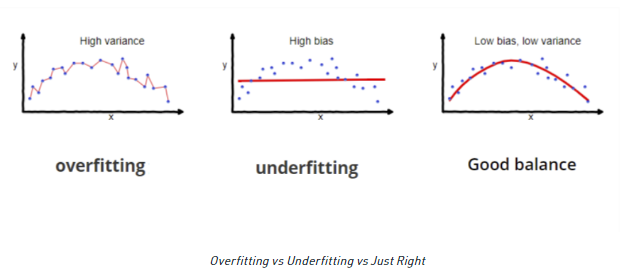

# Implementation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


We are going to use the Boston house prediction dataset. This dataset is present in the datasets module of sklearn (scikit-learn) library. We can import this dataset as follows.

In [ ]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

We can conclude from the above description that we have 13 independent variable and one dependent (House price) variable. Now we need to check for a correlation between independent and dependent variable. We can use scatterplot/corrplot for this.

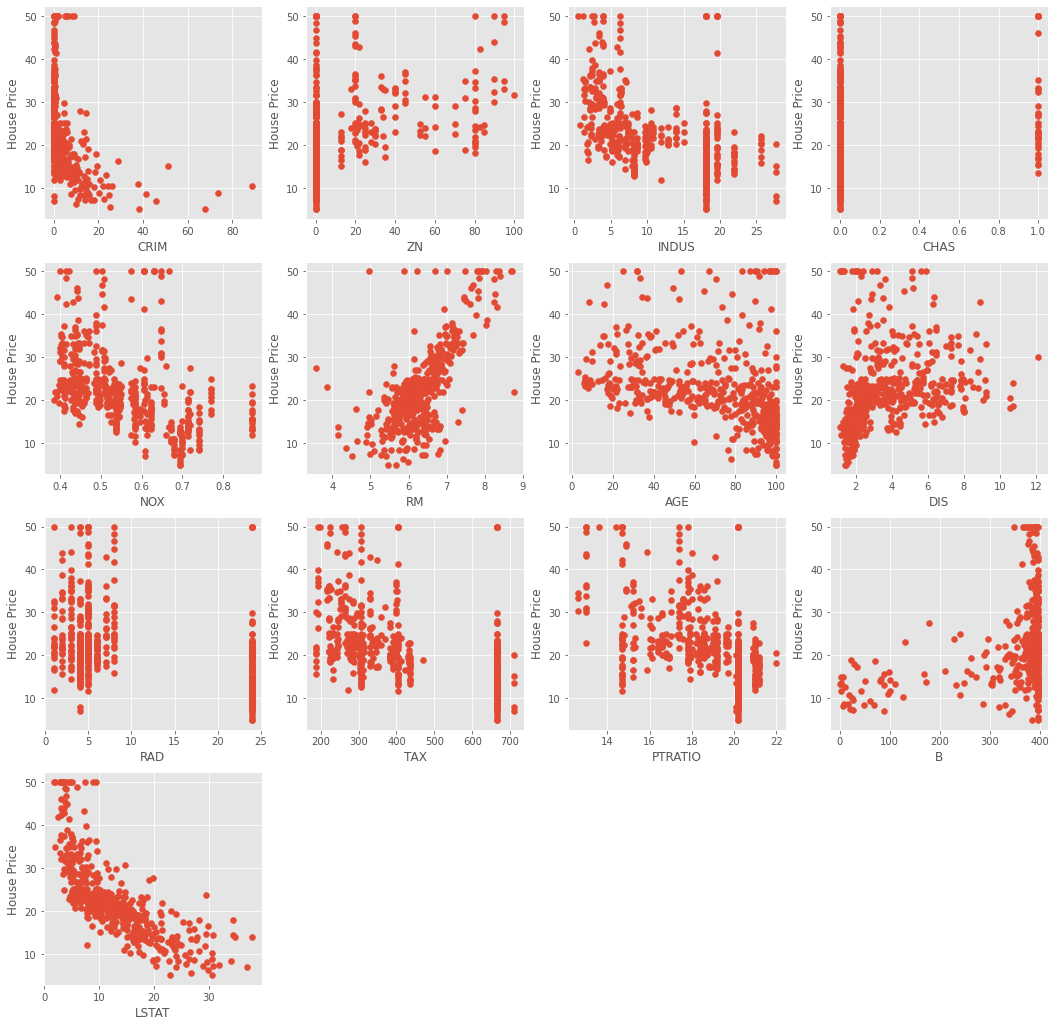

In [ ]:
# Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))

for index, feature_name in enumerate(boston_dataset.feature_names):
	ax = fig.add_subplot(4, 4, index + 1)
	ax.scatter(boston_dataset.data[:, index], boston_dataset.target)
	ax.set_ylabel('House Price', size = 12)
	ax.set_xlabel(feature_name, size = 12)

plt.show()


We can observe from the above scatter plots that some of the independent variables are not very much correlated (either positively or negatively) with the target variable. These variables will get their coefficients to be reduced in regularization. 

In [ ]:
# Load the dataset into Pandas Dataframe
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)


# input
X = boston_pd.iloc[:, :-1]

#output
Y = boston_pd.iloc[:, -1]

print(boston_pd.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [ ]:
boston_pd.rename(columns = {'House Price':'House_Price'}, inplace = True)

In [ ]:
boston_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
boston_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    float64
 4   NOX          506 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    float64
 9   TAX          506 non-null    float64
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  House_Price  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
boston_pd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Now, we apply train-test split to divide the dataset into two parts, one for training and another for testing. We will be using 25% of the data for testing. 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
	boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],
	test_size = 0.25)

print("Train data shape of X = % s and Y = % s : "%(
	x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	x_test.shape, y_test.shape))


Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


# Multiple (Linear) Regression 
Now it’s the right time to test the models. We will be using multiple Linear Regression first. We train the model on training data and calculate the MSE on test. 

In [ ]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)


Mean squared Error on test set :  25.272238965919385
    Columns  Coefficient Estimate
0      CRIM             -0.111754
1        ZN              0.053351
2     INDUS              0.008747
3      CHAS              3.681980
4       NOX            -17.106415
5        RM              3.529791
6       AGE             -0.006924
7       DIS             -1.602746
8       RAD              0.281140
9       TAX             -0.009849
10  PTRATIO             -0.835869
11        B              0.010998
12    LSTAT             -0.572724


Let’s plot a bar chart of above coefficients using matplotlib plotting library. 


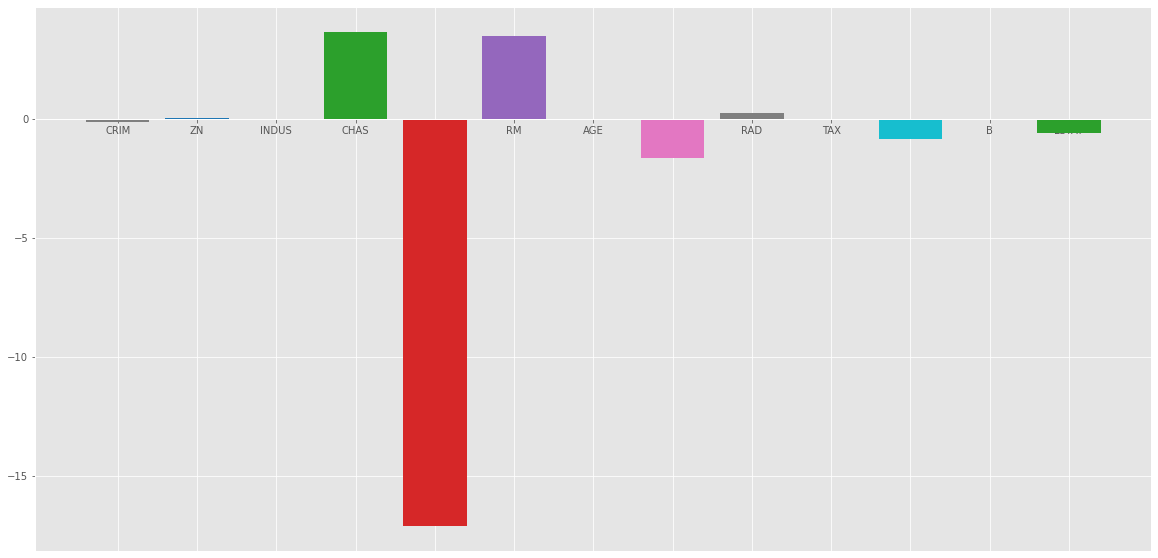

In [ ]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lreg_coefficient["Columns"],
lreg_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()


As we can observe that lots of the variables have an insignificant coefficient, these coefficients did not contribute to the model very much and need to regulate or even eliminate some of these variables. 
  

In [ ]:
#finding intercept
print(f"intercept: {lreg.intercept_}")

intercept: 36.056548497189894


# Ridge Regression: 
Ridge Regression added a term in ordinary least square error function that regularizes the value of coefficients of variables. This term is the sum of squares of coefficient multiplied by the parameter The motive of adding this term is to penalize the variable corresponding to that coefficient not very much correlated to the target variable. This term is called L2 regularization. 

In [ ]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)


25.5206288012572
    Columns  Coefficient Estimate
0      CRIM             -0.107961
1        ZN              0.054940
2     INDUS             -0.022281
3      CHAS              3.432457
4       NOX             -9.032247
5        RM              3.568175
6       AGE             -0.013020
7       DIS             -1.483103
8       RAD              0.262243
9       TAX             -0.010636
10  PTRATIO             -0.752579
11        B              0.011459
12    LSTAT             -0.583062


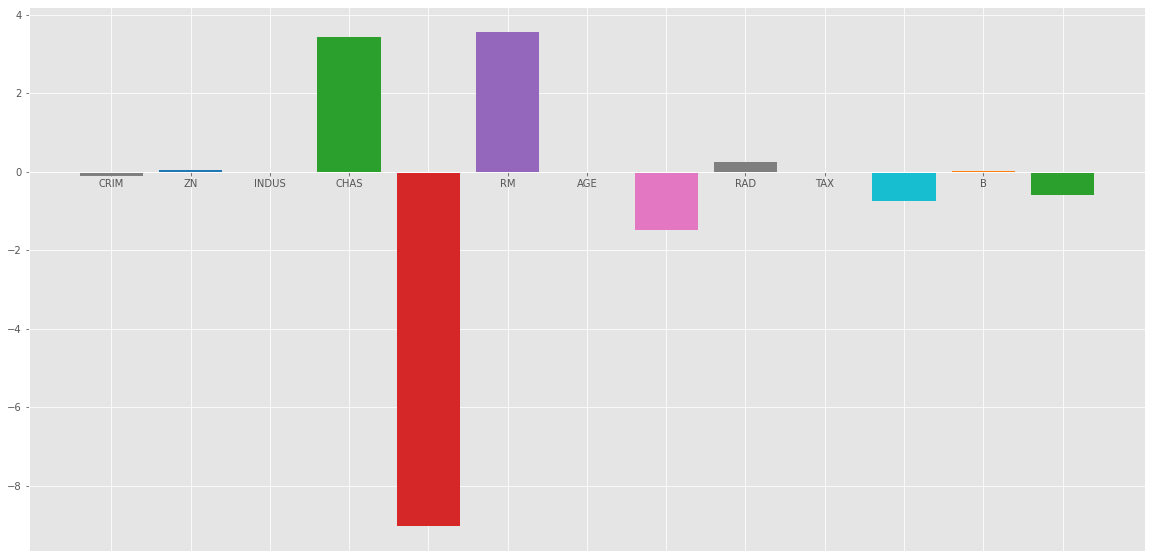

In [ ]:
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()


In [ ]:
ridgeR = Ridge(alpha = 10)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

26.018642292880706
    Columns  Coefficient Estimate
0      CRIM             -0.106021
1        ZN              0.057205
2     INDUS             -0.047273
3      CHAS              2.468655
4       NOX             -1.699674
5        RM              3.381644
6       AGE             -0.016023
7       DIS             -1.370625
8       RAD              0.256334
9       TAX             -0.011857
10  PTRATIO             -0.693364
11        B              0.011943
12    LSTAT             -0.609236


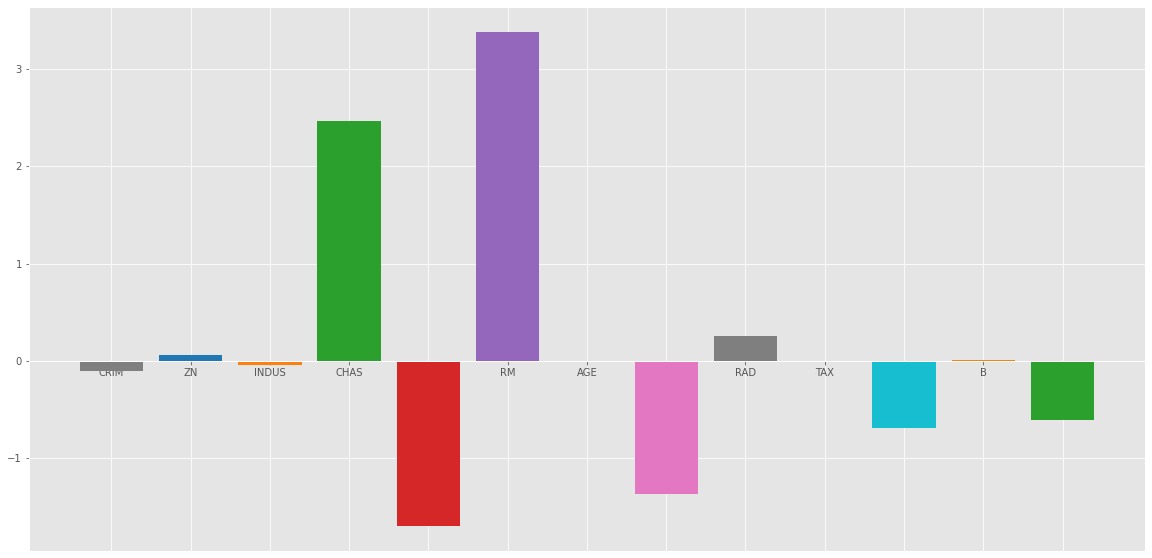

In [ ]:
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()


In [ ]:
ridgeR = Ridge(alpha = 0)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

25.272238965919463
    Columns  Coefficient Estimate
0      CRIM             -0.111754
1        ZN              0.053351
2     INDUS              0.008747
3      CHAS              3.681980
4       NOX            -17.106415
5        RM              3.529791
6       AGE             -0.006924
7       DIS             -1.602746
8       RAD              0.281140
9       TAX             -0.009849
10  PTRATIO             -0.835869
11        B              0.010998
12    LSTAT             -0.572724


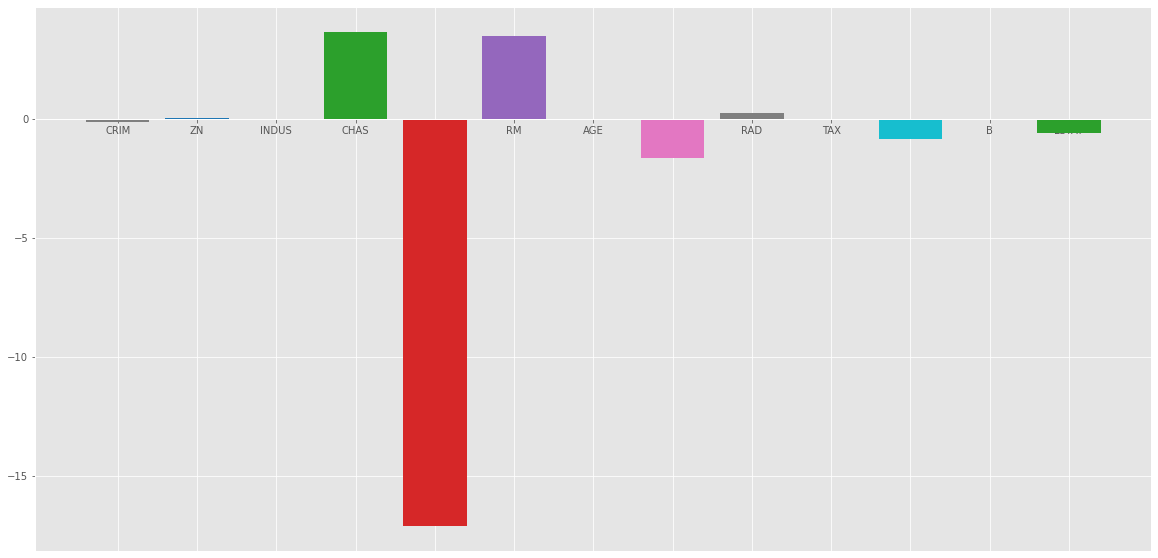

In [ ]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()


# Lasso Regression: 
Lasso Regression is similar to Ridge regression except here we add Mean Absolute value of coefficients in place of mean square value. Unlike Ridge Regression, Lasso regression can completely eliminate the variable by reducing its coefficient value to 0. The new term we added to Ordinary Least Square(OLS) is called L1 Regularization.


Code : Python code implementing the Lasso Regression 

In [ ]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)


Mean squared error on test set 29.866921054883722
    Columns  Coefficient Estimate
0      CRIM             -0.074657
1        ZN              0.056748
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.895360
6       AGE              0.011958
7       DIS             -0.832258
8       RAD              0.241403
9       TAX             -0.013319
10  PTRATIO             -0.581396
11        B              0.010715
12    LSTAT             -0.782014


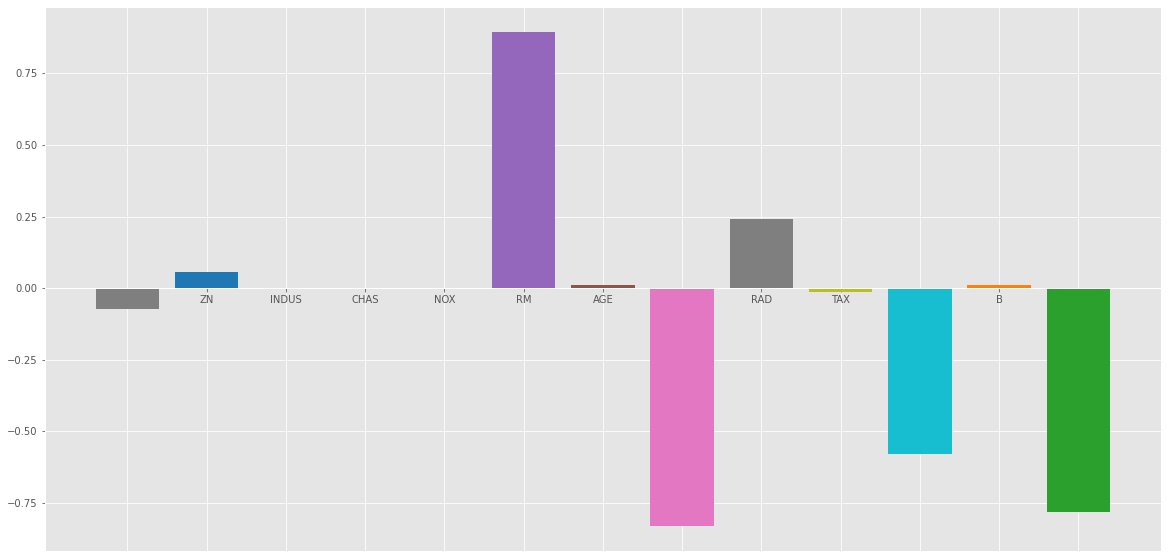

In [ ]:
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lasso_coeff["Columns"],
lasso_coeff['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [ ]:
# Train the model
lasso = Lasso(alpha = 10)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)


Mean squared error on test set 43.146176873500735
    Columns  Coefficient Estimate
0      CRIM             -0.000000
1        ZN              0.028780
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX              0.000000
5        RM              0.000000
6       AGE              0.000000
7       DIS             -0.000000
8       RAD              0.000000
9       TAX             -0.007993
10  PTRATIO             -0.000000
11        B              0.010000
12    LSTAT             -0.581844


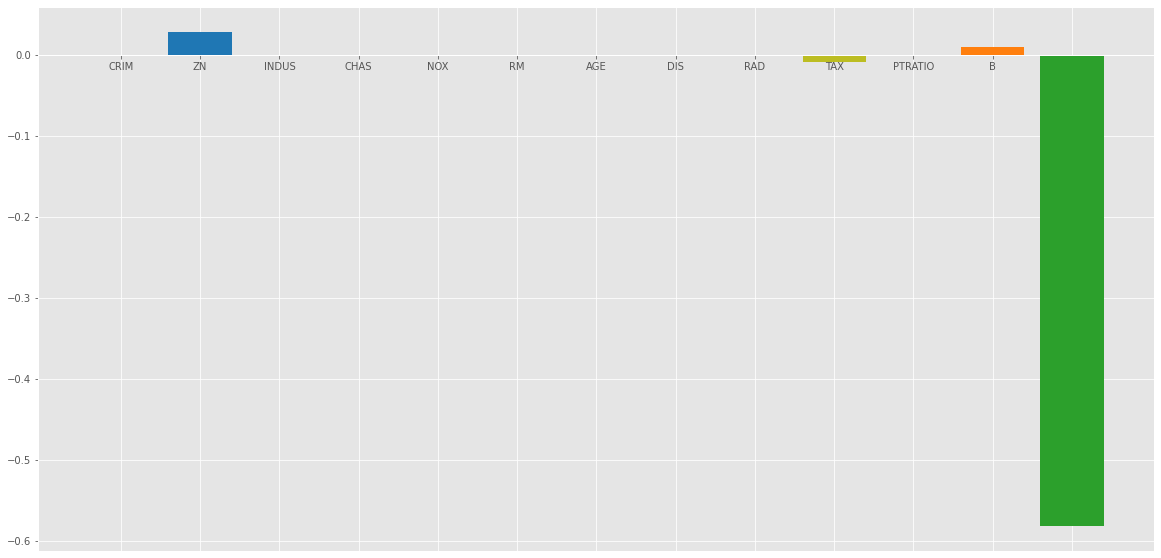

In [ ]:
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lasso_coeff["Columns"],
lasso_coeff['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [ ]:
# Train the model
lasso = Lasso(alpha = 0)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 25.272238965919385
    Columns  Coefficient Estimate
0      CRIM             -0.111754
1        ZN              0.053351
2     INDUS              0.008747
3      CHAS              3.681980
4       NOX            -17.106415
5        RM              3.529791
6       AGE             -0.006924
7       DIS             -1.602746
8       RAD              0.281140
9       TAX             -0.009849
10  PTRATIO             -0.835869
11        B              0.010998
12    LSTAT             -0.572724


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.000e+03, tolerance: 3.222e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge

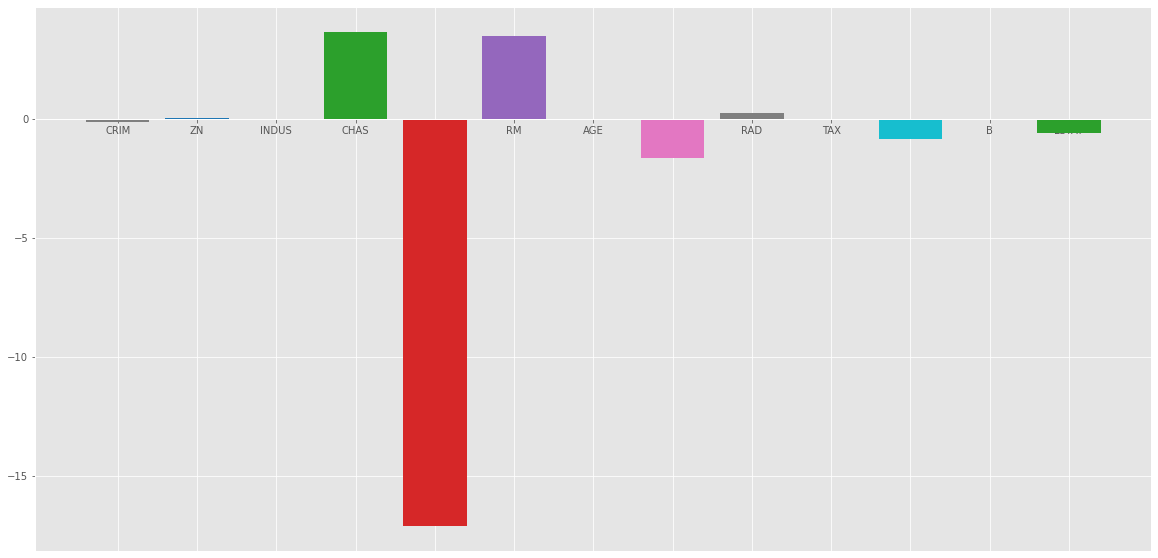

In [ ]:
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lasso_coeff["Columns"],
lasso_coeff['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

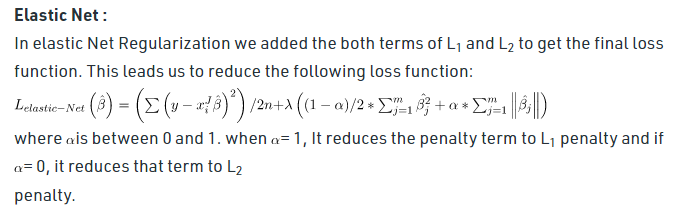

In [ ]:
# import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = 1)
e_net.fit(x_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff


Mean Squared Error on test set 29.39715297895002


,Columns,Coefficient Estimate
0,CRIM,-0.088048
1,ZN,0.058514
2,INDUS,-0.007700
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,0.921142
6,AGE,0.012797
7,DIS,-0.870425
8,RAD,0.278960
9,TAX,-0.014458


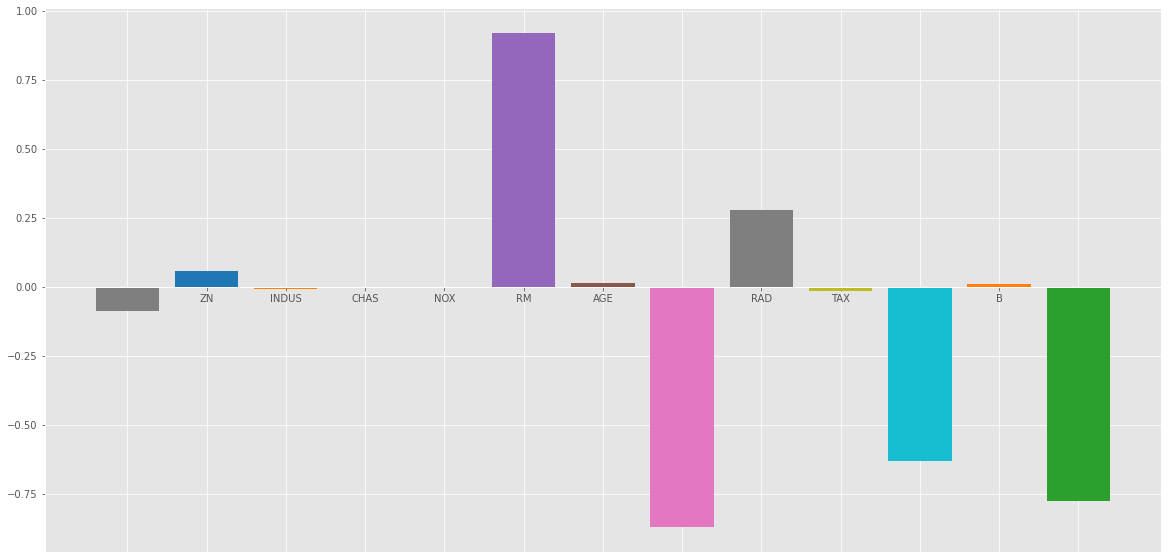

In [ ]:
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(e_net_coeff["Columns"],
e_net_coeff['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [ ]:

# Train the model
e_net = ElasticNet(alpha = 10)
e_net.fit(x_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error on test set 41.912878838990736


,Columns,Coefficient Estimate
0,CRIM,-0.000000
1,ZN,0.039790
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,0.000000
5,RM,0.000000
6,AGE,0.012293
7,DIS,-0.000000
8,RAD,0.000000
9,TAX,-0.007480


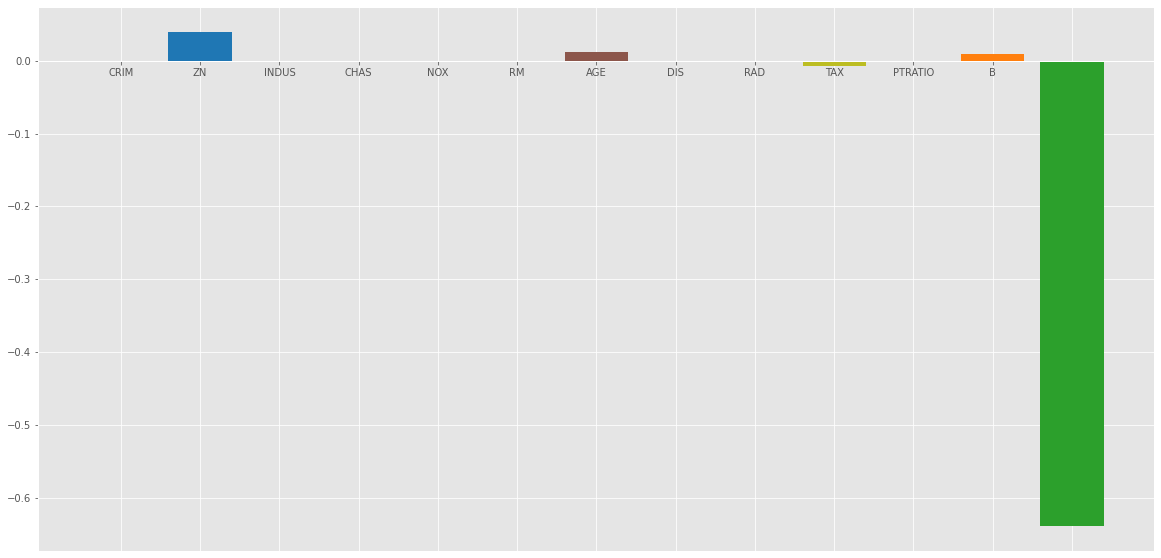

In [ ]:
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(e_net_coeff["Columns"],
e_net_coeff['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [ ]:

# Train the model
e_net = ElasticNet(alpha = 0)
e_net.fit(x_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error on test set 25.272238965919385


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.000e+03, tolerance: 3.222e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg,

,Columns,Coefficient Estimate
0,CRIM,-0.111754
1,ZN,0.053351
2,INDUS,0.008747
3,CHAS,3.681980
4,NOX,-17.106415
5,RM,3.529791
6,AGE,-0.006924
7,DIS,-1.602746
8,RAD,0.281140
9,TAX,-0.009849


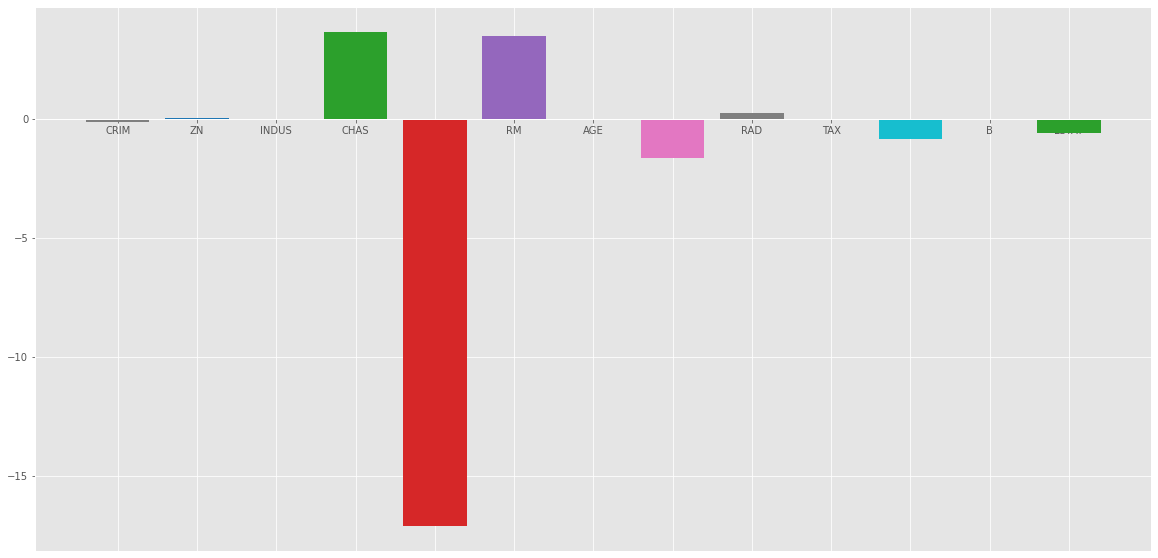

In [ ]:
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(e_net_coeff["Columns"],
e_net_coeff['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

# Conclusion : 
From the above analysis we can reach the following conclusion about different regularization methods: 
 

* Regularization is used to reduce the dependence on any particular independent variable by adding the penalty term to the Loss function. This term prevents the coefficients of the independent variables to take extreme values. 
 
* Ridge Regression adds L2 regularization penalty term to loss function. This term reduces the coefficients but does not make them 0 and thus doesn’t eliminate any independent variable completely. It can be used to measure the impact of the different independent variables. 
 
* Lasso Regression adds L1 regularization penalty term to loss function. This term reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely. It can be used for feature selection etc. 
 
* Elastic Net is a combination of both of the above regularization. It contains both the L1 and L2 as its penalty term. It performs better than Ridge and Lasso Regression for most of the test cases. 

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: House_Price, Length: 506, dtype: float64

**Splitting the data into training data and testing data**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (354, 13) (152, 13)


**Model build- linear .fit .predict**

In [ ]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train))

In [ ]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [ ]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,27.789607,27.789607
1,theta_1,CRIM,-0.093418,-0.093418
2,theta_2,ZN,0.043303,0.043303
3,theta_3,INDUS,-0.022522,-0.022522
4,theta_4,CHAS,3.342047,3.342047
5,theta_5,NOX,-16.330196,-16.330196
6,theta_6,RM,4.271930,4.271930
7,theta_7,AGE,0.000721,0.000721
8,theta_8,DIS,-1.403231,-1.403231
9,theta_9,RAD,0.255429,0.255429


In [ ]:
from sklearn.linear_model import LinearRegression   ## importing the model library

LR=LinearRegression()  ## importing the model object
LR.fit(X_train,y_train) ## fitting the training data

X_test_pred=LR.predict(X_test)

In [ ]:
X_test_pred

array([25.48882634, 26.85383326, 26.50113697, 16.8311552 , 38.90548232,
       15.92640789, 19.23152198, 29.28806615, 33.79428877, 38.25894258,
       16.19079976, 27.79685578, 25.35181876, 25.61234607, 21.35214307,
       19.1221877 , 31.34939126, 31.18316962, 29.08034579, 28.90724661,
       19.59636559, 17.90783181, 24.98877865, 24.00154542, 13.56628155,
       22.08791583, 32.99232593, 28.36965015, 29.65108026, 39.94060342,
       18.66689308, 14.92285788, 19.6923896 , 19.20029267, 20.14718966,
       37.91700834, 24.21072339, 30.86942899, 13.24009483, 36.42525089,
        8.97985188, 13.88836303, 11.78208526, 19.61208754, 36.32061974,
       20.01573887, 11.5591671 , 21.66102362, 13.54102458, 39.34825195,
       22.51984897,  2.71613802, 17.75797283, 18.44448789, 24.04115464,
       32.92544769,  5.97982079, 21.7327963 , 17.46853879, 22.60218768,
       17.64957037, 21.74406196, 21.65178897, 43.91766166, 30.82382874,
       29.34034013, 21.19730767, 16.86447485, 31.17198257, 13.38

In [ ]:
y_test

176    23.2
311    22.1
94     20.6
139    17.8
232    41.7
       ... 
213    28.1
373    13.8
437     8.7
281    35.4
263    31.0
Name: House_Price, Length: 152, dtype: float64

In [ ]:
X_train_pred=LR.predict(X_train)

X_train_pred

array([28.01461138, 36.80216616, 23.70952129, 25.33238798, 14.58713451,
        4.02831675, 16.46964961, 15.31109056, 24.46348312, 19.86827983,
       21.20733862, 21.02551979, 14.23243986, 11.01209312, 28.75588999,
        7.81919285, 25.79608254, 23.49908773, 11.63393429, 34.0170896 ,
       17.05566551, 27.34319041, 26.87326117, 17.35822354, 19.37238392,
       25.39219424, 32.21718937, 26.26119746, 17.51759856, 23.51568418,
       11.42812914, 21.91770534, 21.45374728, 28.02188599, 28.34693427,
       26.48070923, 20.90232834, 22.69199685,  8.89806003, 21.824246  ,
       35.17532263, 24.20971653, 24.88900457, 25.70286413, 28.36671058,
       11.06643436, 28.17656467, 24.17745944, 19.34322413, 42.02777239,
       19.46805125, 20.68112329, 20.84432164, 17.11643776, 37.23989864,
       18.57049292, 24.00951791, 35.74073997, 24.86055626, 18.93177957,
       14.6104225 , 26.97638569, 20.09168866, 28.77204391, 22.4687519 ,
       32.61747803, 18.64840947, 23.41481114, 19.95795005, 23.20

In [ ]:
y_train

481    23.7
97     38.7
51     20.5
293    23.9
27     14.8
       ... 
438     8.4
457    13.5
40     34.9
230    24.3
83     22.9
Name: House_Price, Length: 354, dtype: float64

In [ ]:
regr.fit(X_test, y_test)
y_pred_1 = regr.predict(X_test)
y_pred_1

array([25.86596131, 26.38207535, 27.47781627, 14.51869308, 37.60591037,
       19.76944237, 22.37514869, 26.60309358, 33.51411537, 37.28314251,
       16.45935234, 26.48981281, 24.82069386, 27.27341652, 21.03117945,
       19.70889854, 29.54034459, 29.86771341, 29.13085166, 27.82389273,
       17.33608009, 16.09340345, 24.1195103 , 24.18900152, 14.19795   ,
       23.82559802, 33.21921301, 28.63835329, 27.1662581 , 32.74208664,
       16.61318829, 17.63454095, 21.09635731, 22.3755918 , 19.39008987,
       36.90033246, 26.82811439, 31.37859249, 14.43625931, 36.72710056,
        9.75729984, 12.45780946, 11.63112803, 18.20059189, 30.41478401,
       21.35516573, 15.77026465, 22.88245262, 11.5488842 , 39.63025669,
       21.13976322,  4.22496249, 15.20070509, 17.30325065, 22.37096845,
       30.19744226,  5.34052046, 19.88252507, 18.5101022 , 20.84368362,
       17.73111901, 21.38468674, 17.96125339, 42.97620302, 28.17343557,
       28.06243599, 18.83472769, 15.19581385, 29.77943332, 16.11

#**r2_score**

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
## prediction on training data

train_score=r2_score(y_train,X_train_pred)

In [ ]:
print('Linear Regression training score :',train_score)

Linear Regression training score : 0.7529477712288264


In [ ]:
## prediction on testing data

test_score=r2_score(y_test,X_test_pred)

print('Linear Regression testing score :',test_score)

Linear Regression testing score : 0.6947991644651352


In [ ]:
## mean squared error and mean absolute error of training data

print('MSE:',mean_squared_error(y_train,X_train_pred))
print('MAE:',mean_absolute_error(y_train,X_train_pred))

MSE: 20.996494300515735
MAE: 3.1487505197750743


In [ ]:
## mean squared error and mean absolute error of testing data

print('MSE',mean_squared_error(y_test,X_test_pred))
print('MAE',mean_absolute_error(y_test,X_test_pred))

MSE 25.358577194006948
MAE 3.7824295112050215


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

**Root mean squared error**

In [ ]:
## Root mean squared error

import math
print(math.sqrt(mean_squared_error(y_test,X_test_pred)))

5.035730055712572


In [ ]:
print(math.sqrt(mean_squared_error(y_train,X_train_pred)))

4.582193175818293


In [ ]:
X_train.shape,X_test.shape

((354, 13), (152, 13))

**Adjusted r2 score**

In [ ]:
## adjusted r2 score

train_adjusted_r2score=1-(1-0.71)*(1003-1)/(1003-6-1)
train_adjusted_r2score

0.7082530120481927

#**Addiing y_pred to the dataframe**

In [ ]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
 
lin.fit(X, Y)

LinearRegression()

In [ ]:
k_t=regr.predict(X)
y_pred = pd.DataFrame(k_t)

In [ ]:
boston_pd["y_pred"] = y_pred
boston_pd.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price,y_pred
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,28.941735
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.114119
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,30.267940
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,28.192333
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,27.553892
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,25.097734
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,23.365686
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,20.061575
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,12.783765
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,19.479904


#**Polynomial Linear regression(Plot the best fit line)**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_features = PolynomialFeatures(2)

In [ ]:
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
from sklearn import metrics
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)

In [ ]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

RMSE: 9.094485736301028


In [ ]:
print('R2 score is {}'.format(r2_test))

R2 score is 0.004555324842330344


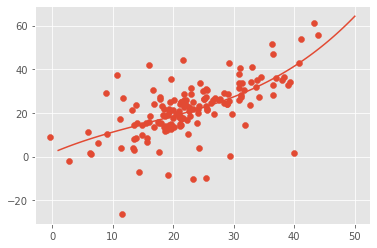

In [ ]:
import matplotlib.pyplot as plt


mymodel = np.poly1d(np.polyfit(X_test_pred, y_test_predict, 3))

myline = np.linspace(1, 50, 100)

plt.scatter(X_test_pred, y_test_predict)
plt.plot(myline, mymodel(myline))
plt.show()

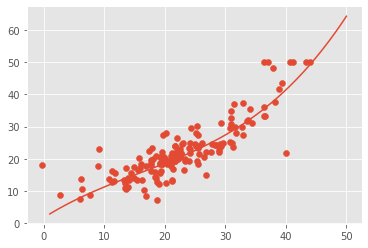

In [ ]:
mymodel = np.poly1d(np.polyfit(X_test_pred, y_test_predict, 3))

myline = np.linspace(1, 50, 100)

plt.scatter(X_test_pred, y_test)
plt.plot(myline, mymodel(myline))
plt.show()

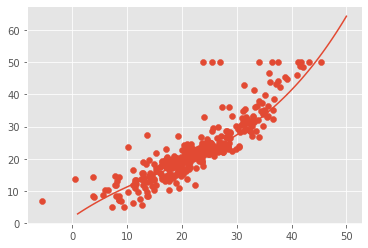

In [ ]:
mymodel = np.poly1d(np.polyfit(X_test_pred, y_test_predict, 3))

myline = np.linspace(1, 50, 100)

plt.scatter(X_train_pred, y_train)
plt.plot(myline, mymodel(myline))
plt.show()

 **Mean of Residuals**

In [ ]:
residuals = y_train.values-X_train_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 3.509559247108856e-14


In [ ]:
residuals = y_test.values-X_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.42498300493017527


In [ ]:
residuals_1 = y_test.values-y_pred_1
mean_residuals_1 = np.mean(residuals_1)
print("Mean of Residuals {}".format(mean_residuals_1))

Mean of Residuals -8.881784197001252e-16


**Check for Homoscedasticity**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


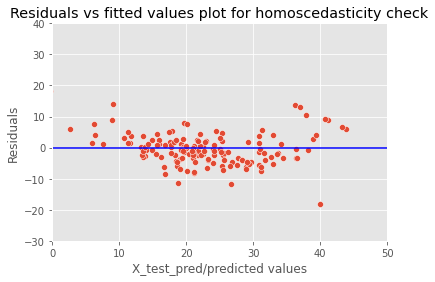

In [ ]:
p = sns.scatterplot(X_test_pred, residuals, )
plt.xlabel('X_test_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-30,40)
plt.xlim(0,50)
p = sns.lineplot([0,50],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


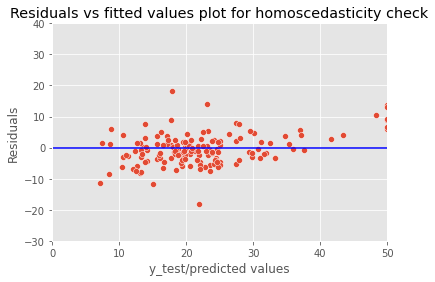

In [ ]:
p = sns.scatterplot(y_test, residuals, )
plt.xlabel('y_test/predicted values')
plt.ylabel('Residuals')
plt.ylim(-30,40)
plt.xlim(0,50)
p = sns.lineplot([0,70],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


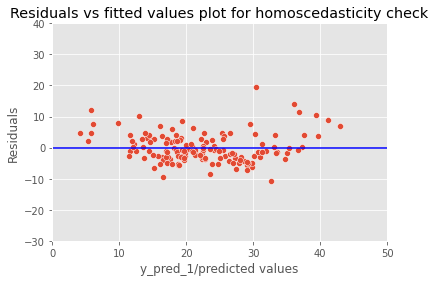

In [ ]:
p = sns.scatterplot(y_pred_1 , residuals_1)
plt.xlabel('y_pred_1/predicted values')
plt.ylabel('Residuals')
plt.ylim(-30,40)
plt.xlim(0,50)
p = sns.lineplot([0,50],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

**Check for Normality of error terms/residuals**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


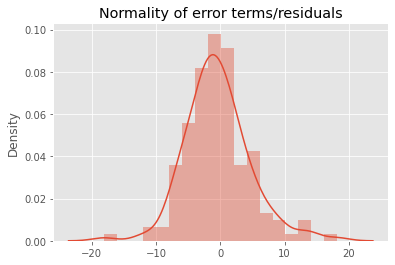

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


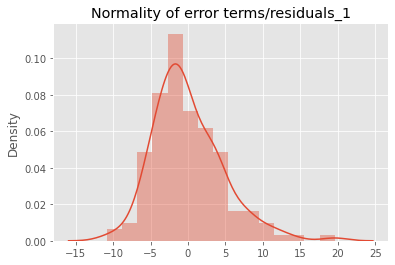

In [ ]:
p = sns.distplot(residuals_1,kde=True)
p = plt.title('Normality of error terms/residuals_1')

**No autocorrelation of residuals**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


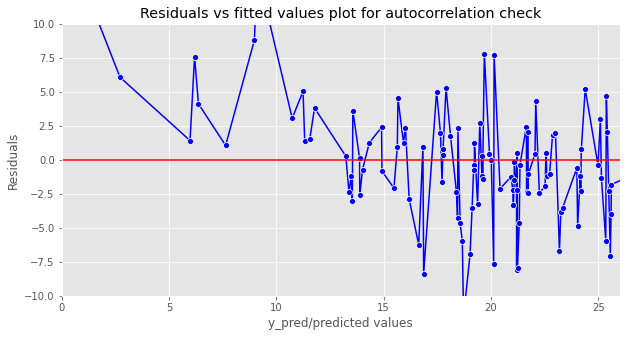

In [ ]:
plt.figure(figsize=(10,5))
p = sns.lineplot(X_test_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


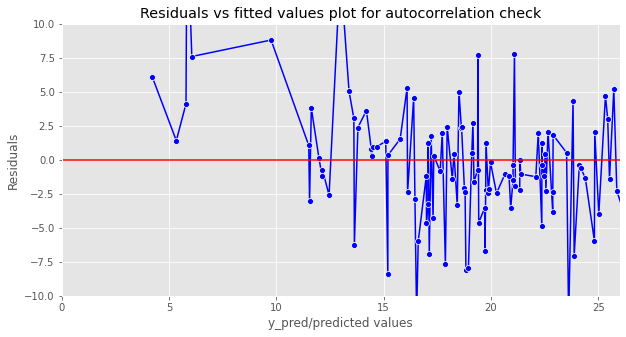

In [ ]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred_1,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [ ]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.048874004564304505

In [ ]:
min(diag.acorr_ljungbox(residuals_1, lags = 40)[1])

0.25220118334717995

#**No perfect multicollinearity**

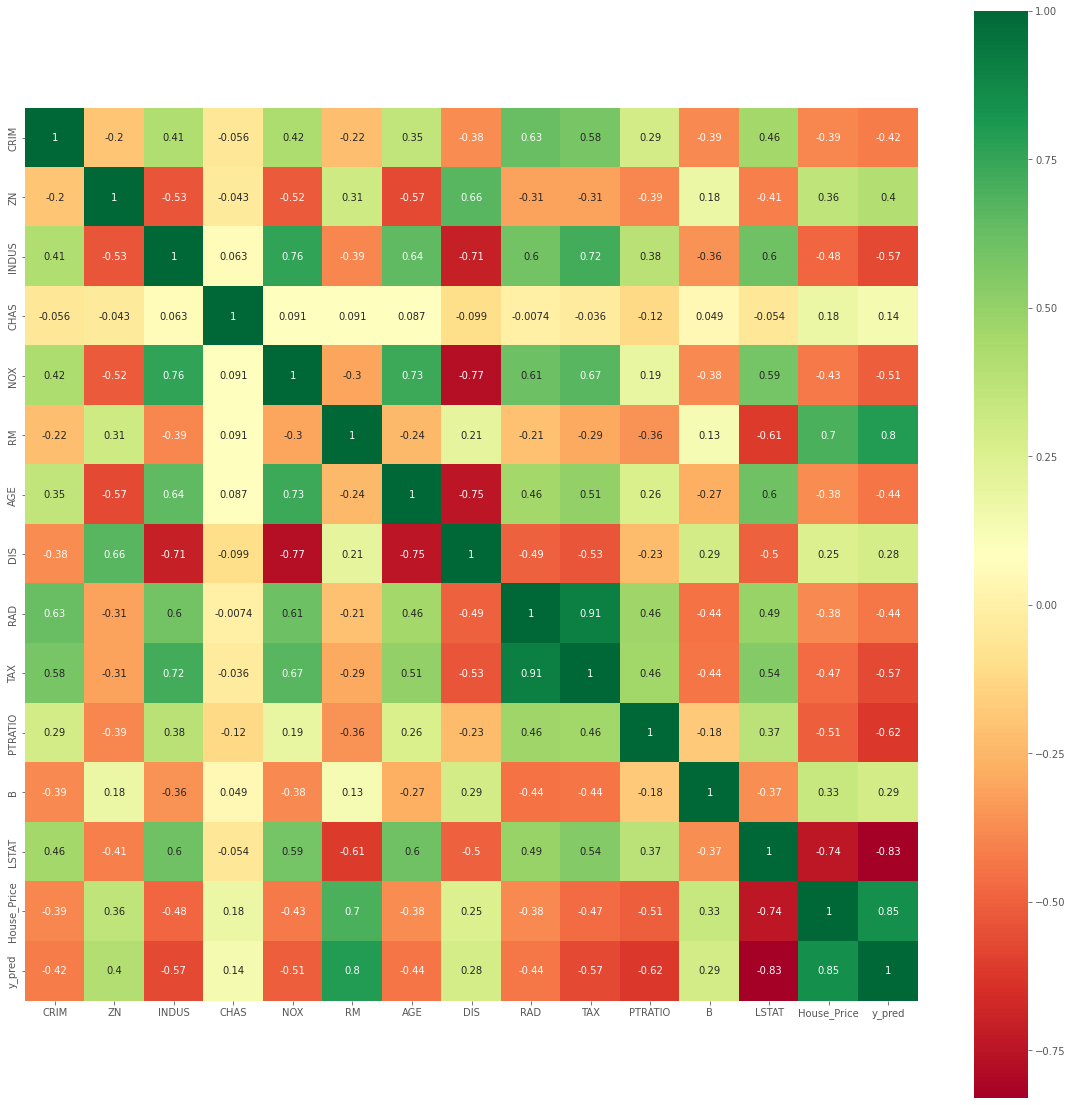

In [ ]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(boston_pd.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

#**Some other model evaluations**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train,y_train)
dec_tree_y_pred = dec_tree.predict(X_train)
print("Accuracy: {}".format(dec_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=dec_tree_y_pred)))

Accuracy: 1.0
R squared: 1.0


In [ ]:
dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train,y_train)
dec_tree_y_pred = dec_tree.predict(X_test)
print("Accuracy: {}".format(dec_tree.score(X_test,y_test)))
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=dec_tree_y_pred)))

Accuracy: 0.7917359657247152
R squared: 0.7917359657247152


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train,y_train)
rf_tree_y_pred = rf_tree.predict(X_train)
print("Accuracy: {}".format(rf_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

Accuracy: 0.9853311937319518
R squared: 0.9853311937319518


In [ ]:
rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train,y_train)
rf_tree_y_pred = rf_tree.predict(X_test)
print("Accuracy: {}".format(rf_tree.score(X_test,y_test)))
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=rf_tree_y_pred)))

Accuracy: 0.8307333714221925
R squared: 0.8307333714221925


In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train,y_train)
svr_y_pred = svr.predict(X_train)
print("Accuracy: {}".format(svr.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=svr_y_pred)))

Accuracy: 0.2096313266695522
R squared: 0.2096313266695522


In [ ]:
svr = SVR()
svr.fit(X_train,y_train)
svr_y_pred = svr.predict(X_test)
print("Accuracy: {}".format(svr.score(X_test,y_test)))
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=svr_y_pred)))

Accuracy: 0.180066485140702
R squared: 0.180066485140702
